# EDA: This df has all genres as dummy variables, MPAA rating as ordinal data, and a binary column of whether or not a show is produced by a large company.

#### Note: The scraped data for production company only yeilded about 502 usable rows. After the inner merge, there are only 477 rows of data in this data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# Load data
df = pd.read_pickle('all_scraped_features_df.pkl')

# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 476
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    477 non-null    object 
 1   Start_Year               477 non-null    int64  
 2   End_Year                 477 non-null    int64  
 3   Genres                   477 non-null    object 
 4   Num_of_Seasons           477 non-null    int64  
 5   Num_of_Episodes          477 non-null    int64  
 6   Num_Episodes_Per_Season  477 non-null    float64
 7   Season_1_Rating          477 non-null    float64
 8   Years_Ran                477 non-null    int64  
 9   Action                   477 non-null    int64  
 10  Adventure                477 non-null    int64  
 11  Animation                477 non-null    int64  
 12  Biography                477 non-null    int64  
 13  Comedy                   477 non-null    int64  
 14  Crime                    4

In [3]:
# Load a copy in case i mess up
copy_df = pd.read_pickle('all_scraped_features_df.pkl')

In [4]:
df.head(3)

,Title,Start_Year,End_Year,Genres,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,...,Sci-fi,Sport,Thriller,War,MPAA_Rating,Runtime,Series_Type,Ordinal_MPAA,Production_Co,Large_prod_co
0,Chernobyl,2019,2019,"[Drama, History, Thriller]",1,5,5.00,9.6,1,0,...,0,0,1,0,TV-MA,5h 30min,TV Mini-Series (2019),6,"Production Co: Home Box Office (HBO), Sister P...",1
1,Game of Thrones,2011,2019,"[Action, Drama, Adventure]",8,73,9.12,9.1,8,1,...,0,0,0,0,TV-MA,57min,TV Series (2011–2019),6,"Production Co: Home Box Office (HBO), Televisi...",1
2,Sherlock,2010,2017,"[Drama, Crime, Mystery]",4,12,3.00,8.8,7,0,...,0,0,0,0,TV-14,1h 28min,TV Series (2010–2017),5,"Production Co: Hartswood Films, BBC Wales, Mas...",0


In [5]:
df.shape

(477, 35)

In [6]:
df.describe()

,Start_Year,End_Year,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,Adventure,Animation,...,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War,Ordinal_MPAA,Large_prod_co
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,...,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,2012.861635,1394.014675,3.725367,53.828092,12.329979,8.084906,3.846960,0.245283,0.169811,0.037736,...,0.010482,0.205451,0.016771,0.075472,0.104822,0.008386,0.088050,0.002096,5.310273,0.394130
std,6.067005,931.384495,3.258158,64.618010,5.482055,0.496313,3.656992,0.430707,0.375861,0.190757,...,0.101951,0.404455,0.128549,0.264428,0.306645,0.091285,0.283666,0.045787,0.777952,0.489176
min,1995.000000,0.000000,1.000000,2.000000,2.000000,5.400000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,0.000000,1.000000,13.000000,8.330000,7.800000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,2015.000000,2013.000000,3.000000,29.000000,10.500000,8.100000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,2018.000000,2018.000000,5.000000,72.000000,15.400000,8.400000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,2020.000000,2020.000000,28.000000,478.000000,34.670000,9.600000,22.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000


In [7]:
df.corr()

,Start_Year,End_Year,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran,Action,Adventure,Animation,...,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War,Ordinal_MPAA,Large_prod_co
Start_Year,1.000000,-0.350029,-0.581571,-0.560958,-0.378496,-0.062790,-0.621636,0.054821,0.002034,-0.158852,...,-0.004443,0.017602,-0.015874,-0.138833,0.081212,-0.069974,0.131606,-0.036767,0.308228,-0.071486
End_Year,-0.350029,1.000000,0.011834,0.027423,0.029890,0.000594,-0.035479,-0.009954,0.011455,-0.106637,...,0.024048,0.092530,-0.089683,0.035524,0.095141,0.061254,-0.080611,0.030247,-0.071509,0.017731
Num_of_Seasons,-0.581571,0.011834,1.000000,0.893843,0.442869,0.050827,0.864655,-0.065673,-0.018450,0.135016,...,-0.035587,-0.027239,0.161498,0.109454,-0.133037,0.057204,-0.064704,-0.038380,-0.250602,0.079919
Num_of_Episodes,-0.560958,0.027423,0.893843,1.000000,0.694821,0.020960,0.791586,-0.026185,0.019888,0.166361,...,-0.023962,-0.025816,0.056747,0.169695,-0.124091,0.044052,-0.090977,-0.033251,-0.360098,0.142250
Num_Episodes_Per_Season,-0.378496,0.029890,0.442869,0.694821,1.000000,-0.029767,0.395370,0.145236,0.163441,0.183117,...,-0.003683,-0.054479,-0.032017,0.081231,-0.061423,0.013896,-0.104104,-0.044610,-0.466217,0.210754
Season_1_Rating,-0.062790,0.000594,0.050827,0.020960,-0.029767,1.000000,0.059492,-0.038662,-0.071821,0.028219,...,0.052956,-0.026381,0.000683,0.067927,-0.100013,0.007437,0.055719,0.038375,0.018684,0.046188
Years_Ran,-0.621636,-0.035479,0.864655,0.791586,0.395370,0.059492,1.000000,-0.096159,-0.062059,0.182965,...,-0.023862,0.012780,0.063567,0.094525,-0.150525,0.041612,-0.063939,-0.035720,-0.229175,0.034963
Action,0.054821,-0.009954,-0.065673,-0.026185,0.145236,-0.038662,-0.096159,1.000000,0.416987,0.193946,...,-0.058675,-0.229592,-0.074456,-0.162882,0.027611,-0.052425,-0.073971,-0.026130,-0.077131,0.098583
Adventure,0.002034,0.011455,-0.018450,0.019888,0.163441,-0.071821,-0.062059,0.416987,1.000000,0.232751,...,-0.046549,-0.174701,-0.015587,-0.086944,-0.045397,-0.041591,-0.140532,-0.020730,-0.223677,0.092272
Animation,-0.158852,-0.106637,0.135016,0.166361,0.183117,0.028219,0.182965,0.193946,0.232751,1.000000,...,-0.020382,-0.100699,-0.025864,-0.056580,-0.031849,-0.018211,-0.061533,-0.009077,-0.206473,0.042904


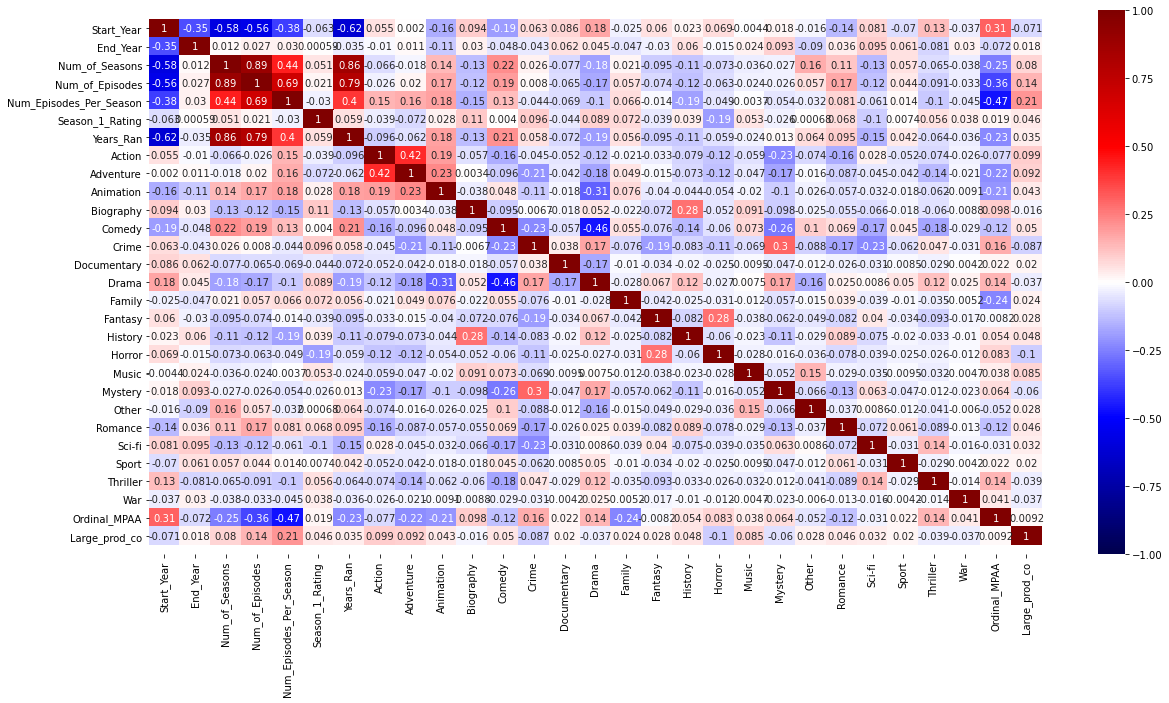

In [8]:
# try a heatmap for the corr matrix
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(df.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off


In [9]:
#These are the only columns we care about for our model
features = ['Start_Year', 'Num_Episodes_Per_Season', 'Season_1_Rating',
            'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 
            'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 
            'History', 'Horror', 'Music', 'Mystery', 'Other', 'Romance', 
            'Sci-fi', 'Sport', 'Thriller', 'War', 'Ordinal_MPAA', 'Large_prod_co']

target = 'Num_of_Seasons'

In [10]:
# Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
X = df[features]
#X = tv_show_df['Season_1_Rating'].values.reshape(-1,1)

# Choose the response variable
y = df[target]

# Fit the model 
lr.fit(X, y)

LinearRegression()

In [11]:
lr.score(X, y)

0.4598223893520449

In [12]:
# print out intercept
print(lr.intercept_)

# print out other coefficients
print(lr.coef_)

484.6994422265623
[-0.2403463   0.15999563  0.10781739 -0.53886731 -0.34699252  0.39251987
 -0.60914788  0.19462775  0.39182121 -1.42063116 -0.41723016 -0.34729076
 -0.40570428 -0.7329737  -0.33425328 -2.18628176 -0.22785907  3.96671568
  0.17575089 -0.74829089  0.52288007  0.25413134 -3.23578636  0.08875549
  0.01960946]


In [13]:
#add a constant since statsmodels.api does not add one by default
#Note: statsmodels.api does not include constant by default
# Add a column of ones with sm.add_constant()
sm.add_constant(X).head()

,const,Start_Year,Num_Episodes_Per_Season,Season_1_Rating,Action,Adventure,Animation,Biography,Comedy,Crime,...,Music,Mystery,Other,Romance,Sci-fi,Sport,Thriller,War,Ordinal_MPAA,Large_prod_co
0,1.0,2019,5.00,9.6,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,6,1
1,1.0,2011,9.12,9.1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,6,1
2,1.0,2010,3.00,8.8,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,5,0
3,1.0,2008,12.40,8.8,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,6,1
4,1.0,2016,8.33,8.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1


In [14]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Num_of_Seasons   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     15.36
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           7.84e-46
Time:                        20:59:41   Log-Likelihood:                -1092.9
No. Observations:                 477   AIC:                             2238.
Df Residuals:                     451   BIC:                             2346.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     484.6994     43.292     11.196      0.000     399.620     569.779
Start_Year                 -0.2403      0.021    -11.194      0.000      -0.283      -0.198
Num_Episodes_Per_Season     0.1600      0.026      6.141      0.000       0.109       0.211
Season_1_Rating             0.1078      0.240      0.450      0.653      -0.363       0.579
Action                     -0.5389      0.327     -1.646      0.100      -1.182       0.105
Adventure                  -0.3470      0.377     -0.920      0.358      -1.088       0.394
Animation                   0.3925      0.660      0.594      0.553      -0.905       1.690
Biography                  -0.6091      0.666     -0.914      0.361      -1.919       0.701
Comedy                      0.1946      0.368      0.529      0.597      -0.528       0.917
Crime                       0.3918      0.310      1.263      0.207      -0.218       1.002
Documentary                -1.4206      1.332     -1.066      0.287      -4.039       1.198
Drama                      -0.4172      0.354     -1.178      0.240      -1.114       0.279
Family                     -0.3473      1.059     -0.328      0.743      -2.429       1.735
Fantasy                    -0.4057      0.387     -1.049      0.295      -1.166       0.354
History                    -0.7330      0.612     -1.197      0.232      -1.936       0.470
Horror                     -0.3343      0.504     -0.663      0.508      -1.325       0.656
Music                      -2.1863      1.146     -1.908      0.057      -4.438       0.065
Mystery                    -0.2279      0.337     -0.676      0.499      -0.890       0.434
Other                       3.9667      0.928      4.276      0.000       2.144       5.790
Romance                     0.1758      0.480      0.366      0.714      -0.768       1.119
Sci-fi                     -0.7483      0.421     -1.779      0.076      -1.575       0.078
Sport                       0.5229      1.257      0.416      0.678      -1.948       2.994
Thriller                    0.2541      0.438      0.580      0.562      -0.607       1.115
War                        -3.2358      2.494     -1.298      0.195      -8.137       1.665
Ordinal_MPAA                0.0888      0.182      0.489      0.625      -0.268       0.445
Large_prod_co               0.0196      0.246      0.080      0.936      -0.463       0.502
==============================================================================
Omnibus:                      204.221   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1977.193
Skew:                           1.587   Prob(JB):                         0.00
Kurtosis:                      12.456   Cond. No.                     7.74e+05
====================

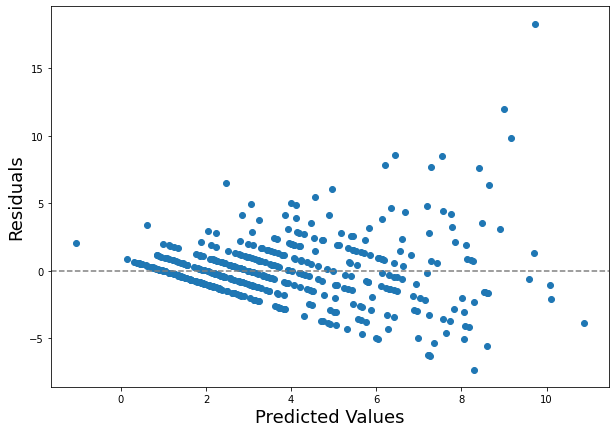

In [15]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(fit.predict(), fit.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);